In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re


# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"
f3 = "families_per_bin_used.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')
family_bin = pd.read_csv(f3, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['family'].isin(exclusion)]
HF2 = HF1[~HF1['family'].isin(exclusion)]

GH_commit = GH2[~GH2['label'].isin(excluded_labels)]
HF_commit = HF2[~HF2['label'].isin(excluded_labels)]

GH = GH_commit.groupby(['label', 'commit_message'])['owner'].nunique().reset_index()
HF = HF_commit.groupby(['label', 'combined'])['owner'].nunique().reset_index()

GH_model_structure = GH[GH['label'] == "model structure"]
GH_external = GH[GH['label'] == "external documentation"]
GH_training = GH[GH['label'] == "training infrastructure"]
GH_validation = GH[GH['label'] == "validation infrastructure"]
GH_preprocessing = GH[GH['label'] == "preprocessing"]
GH_sharing = GH[GH['label'] == "sharing"]
GH_internal = GH[GH['label'] == "internal documentation"]
GH_pipeline = GH[GH['label'] == "pipeline performance"]
GH_parameter = GH[GH['label'] == "parameter tuning"]
GH_input = GH[GH['label'] == "input data"]
GH_update = GH[GH['label'] == "update dependency"]
GH_add = GH[GH['label'] == "add dependency"]
GH_project = GH[GH['label'] == "project metadata"]
GH_remove = GH[GH['label'] == "remove dependency"]
GH_output = GH[GH['label'] == "output data"]



HF_model_structure = HF[HF['label'] == "model structure"]
HF_external = HF[HF['label'] == "external documentation"]
HF_training = HF[HF['label'] == "training infrastructure"]
HF_validation = HF[HF['label'] == "validation infrastructure"]
HF_preprocessing = HF[HF['label'] == "preprocessing"]
HF_sharing = HF[HF['label'] == "sharing"]
HF_internal = HF[HF['label'] == "internal documentation"]
HF_pipeline = HF[HF['label'] == "pipeline performance"]
HF_parameter = HF[HF['label'] == "parameter tuning"]
HF_input = HF[HF['label'] == "input data"]
HF_update = HF[HF['label'] == "update dependency"]
HF_add = HF[HF['label'] == "add dependency"]
HF_project = HF[HF['label'] == "project metadata"]
HF_remove = HF[HF['label'] == "remove dependency"]
HF_output = HF[HF['label'] == "output data"]

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_3776\136268433.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


In [2]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = GH_external['commit_message'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:26:44,889 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/495 [00:00<?, ?it/s]

2025-03-27 13:28:11,219 - BERTopic - Embedding - Completed ✓
2025-03-27 13:28:11,219 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:28:41,720 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:28:41,721 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:30:01,772 - BERTopic - Cluster - Completed ✓
2025-03-27 13:30:01,778 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:30:02,281 - BERTopic - Representation - Completed ✓


                Word     Score
210           avatar  0.956473
252        custommoe  0.903349
144           spaces  0.758134
244  acknowledgement  0.691615
167             news  0.660905
227      leaderboard  0.654028
195     textdiffuser  0.651292
241          chapter  0.650491
181           header  0.642447
246          featdoc  0.607847


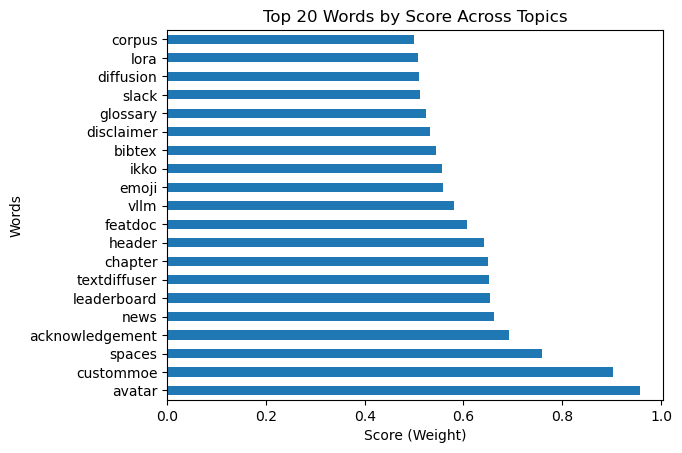

In [3]:
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_external.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:36:53,680 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/312 [00:00<?, ?it/s]

2025-03-27 13:37:51,547 - BERTopic - Embedding - Completed ✓
2025-03-27 13:37:51,547 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:37:59,862 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:37:59,864 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:38:23,726 - BERTopic - Cluster - Completed ✓
2025-03-27 13:38:23,730 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:38:24,107 - BERTopic - Representation - Completed ✓


         Word     Score
148  watchdog  1.106670
132   jupiter  1.057190
124  finetune  0.685607
154      lock  0.561180
156      bump  0.542880
119   tatoeba  0.492211
152     setup  0.486659
69     beaker  0.481794
144      lora  0.457183
136     proxy  0.457183


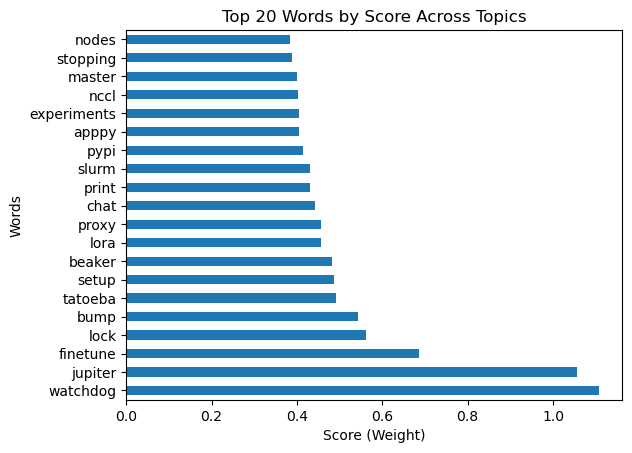

In [4]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = GH_training['commit_message'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_training.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:39:29,521 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/266 [00:00<?, ?it/s]

2025-03-27 13:40:14,867 - BERTopic - Embedding - Completed ✓
2025-03-27 13:40:14,868 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:40:22,088 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:40:22,090 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:40:34,667 - BERTopic - Cluster - Completed ✓
2025-03-27 13:40:34,671 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:40:34,979 - BERTopic - Representation - Completed ✓


              Word     Score
48            edit  0.831906
117  wandblogmodel  0.711830
140      baselines  0.614926
136         vision  0.578814
141          squad  0.504214
133        roberta  0.477750
60     leaderboard  0.470000
89        coverage  0.432145
109      monitorpy  0.411528
51          travis  0.396881


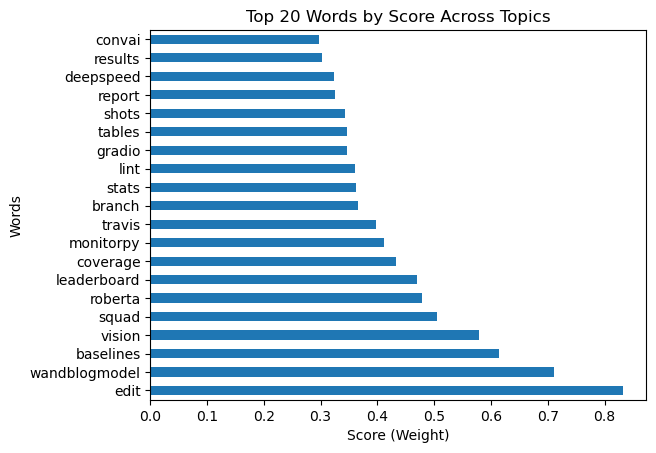

In [5]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = GH_validation['commit_message'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_validation.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 14:52:51,910 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/185 [00:00<?, ?it/s]

2025-03-27 14:53:22,013 - BERTopic - Embedding - Completed ✓
2025-03-27 14:53:22,014 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 14:53:28,078 - BERTopic - Dimensionality - Completed ✓
2025-03-27 14:53:28,080 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 14:53:32,334 - BERTopic - Cluster - Completed ✓
2025-03-27 14:53:32,338 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 14:53:32,599 - BERTopic - Representation - Completed ✓


             Word     Score
71         clippy  0.716503
95      localdocs  0.674556
103        quotes  0.615160
79        tatoeba  0.572802
101          glue  0.529937
65   eegmodelling  0.509683
86      alignment  0.504667
64           lint  0.493490
57        cleanup  0.484113
93           wiki  0.478815


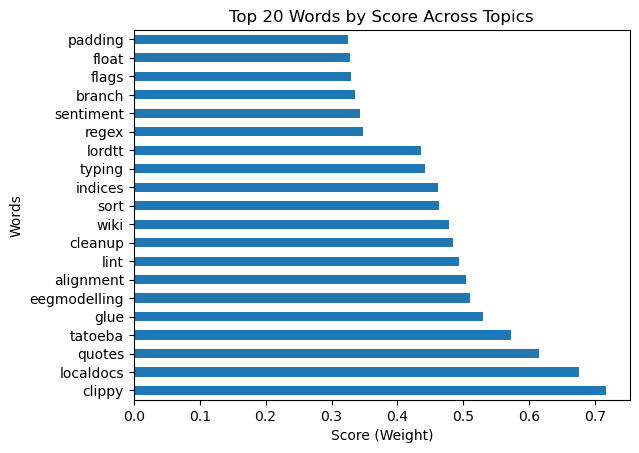

In [7]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = GH_preprocessing['commit_message'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_preprocessing.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:01:27,872 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/129 [00:00<?, ?it/s]

2025-03-27 15:01:47,000 - BERTopic - Embedding - Completed ✓
2025-03-27 15:01:47,001 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:01:52,589 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:01:52,591 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:01:54,269 - BERTopic - Cluster - Completed ✓
2025-03-27 15:01:54,272 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:01:54,425 - BERTopic - Representation - Completed ✓


                 Word     Score
55            develop  0.577340
60              xlnet  0.519205
71             commit  0.498440
68            resolve  0.492119
74            gitbook  0.452114
72           mitchish  0.405533
75  originbigrefactor  0.393777
45     upstreammaster  0.381678
9         bigrefactor  0.375800
19              patch  0.347169


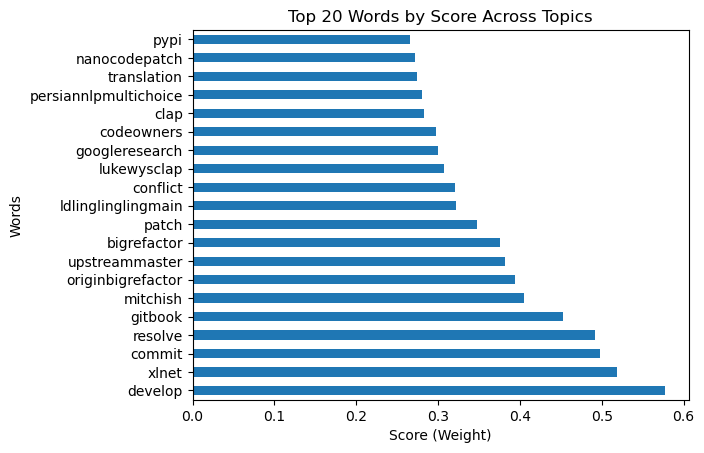

In [9]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_sharing['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_sharing.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:09:14,697 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/123 [00:00<?, ?it/s]

2025-03-27 15:09:33,913 - BERTopic - Embedding - Completed ✓
2025-03-27 15:09:33,913 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:09:53,938 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:09:53,940 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:09:55,742 - BERTopic - Cluster - Completed ✓
2025-03-27 15:09:55,745 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:09:55,883 - BERTopic - Representation - Completed ✓


         Word     Score
71       tidy  0.824729
57     length  0.800559
45      isort  0.610114
62  changelog  0.567823
38      flake  0.548318
67    cleanup  0.528380
55     branch  0.509946
50       ruff  0.502885
33  gitignore  0.502589
46      woops  0.498994


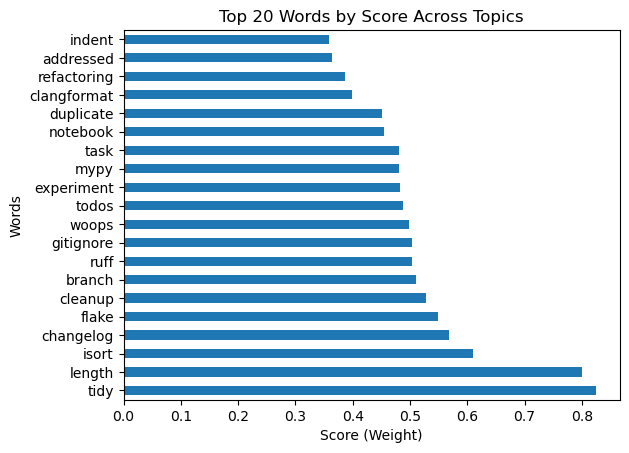

In [10]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_internal['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_internal.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:15:40,135 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/116 [00:00<?, ?it/s]

2025-03-27 15:15:59,885 - BERTopic - Embedding - Completed ✓
2025-03-27 15:15:59,885 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:16:13,104 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:16:13,106 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:16:14,228 - BERTopic - Cluster - Completed ✓
2025-03-27 15:16:14,231 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:16:14,390 - BERTopic - Representation - Completed ✓


            Word     Score
62      prefetch  0.746435
56      simplify  0.437980
65   feattoolkit  0.417194
49          path  0.409604
63        linted  0.392991
33  optimization  0.390638
39         proxy  0.362646
30          tqdm  0.332812
47          sort  0.322070
24          cuda  0.309947


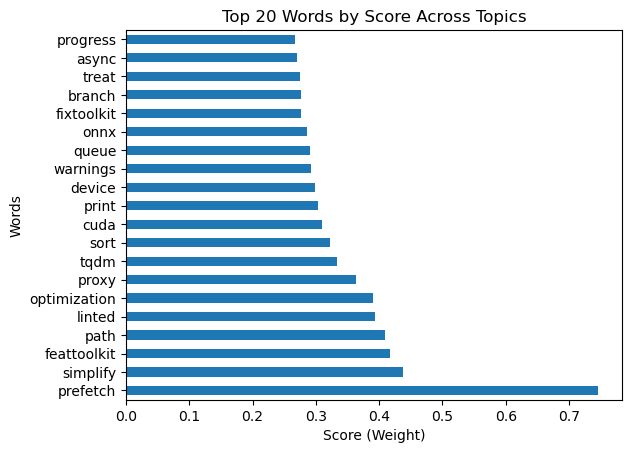

In [11]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_pipeline['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_pipeline.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:17:25,736 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/108 [00:00<?, ?it/s]

2025-03-27 15:17:42,380 - BERTopic - Embedding - Completed ✓
2025-03-27 15:17:42,380 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:17:54,242 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:17:54,243 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:17:55,420 - BERTopic - Cluster - Completed ✓
2025-03-27 15:17:55,423 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:17:55,567 - BERTopic - Representation - Completed ✓


            Word     Score
70          mcli  0.958456
62         tweak  0.670706
63        global  0.581056
60      criteria  0.537308
69       timeout  0.508102
43  usedevoption  0.483396
72      interval  0.376319
71        anneal  0.373974
61    configjson  0.359274
39      clipping  0.345614


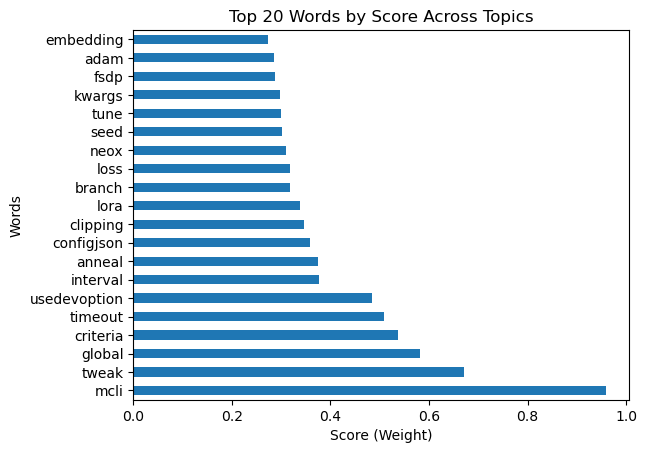

In [12]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_parameter['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_parameter.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:19:08,625 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/89 [00:00<?, ?it/s]

2025-03-27 15:19:21,620 - BERTopic - Embedding - Completed ✓
2025-03-27 15:19:21,621 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:19:31,114 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:19:31,116 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:19:31,767 - BERTopic - Cluster - Completed ✓
2025-03-27 15:19:31,770 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:19:31,877 - BERTopic - Representation - Completed ✓


              Word     Score
33        testdata  0.568969
44         samples  0.517358
41  customtraintxt  0.509313
45         tatoeba  0.484690
18          prompt  0.431307
42          arabic  0.420781
27         partial  0.385895
43            json  0.364366
35        template  0.349382
10          branch  0.347422


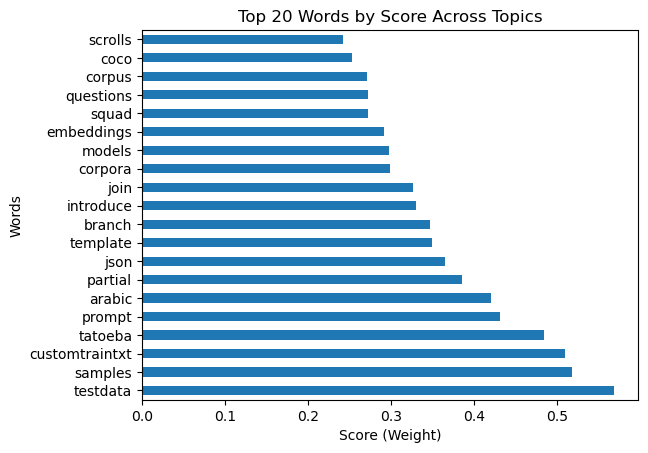

In [13]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_input['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_input.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:21:47,190 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/89 [00:00<?, ?it/s]

2025-03-27 15:22:06,836 - BERTopic - Embedding - Completed ✓
2025-03-27 15:22:06,837 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:22:15,726 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:22:15,728 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:22:16,876 - BERTopic - Cluster - Completed ✓
2025-03-27 15:22:16,879 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:22:17,035 - BERTopic - Representation - Completed ✓


               Word     Score
79           pandas  0.626431
49           legion  0.596521
65          sklearn  0.533301
77            flair  0.500822
63           chrome  0.474787
73            scann  0.474056
62  vulnerabilities  0.434441
60             tqdm  0.430409
66             deno  0.420045
69          corenlp  0.373737


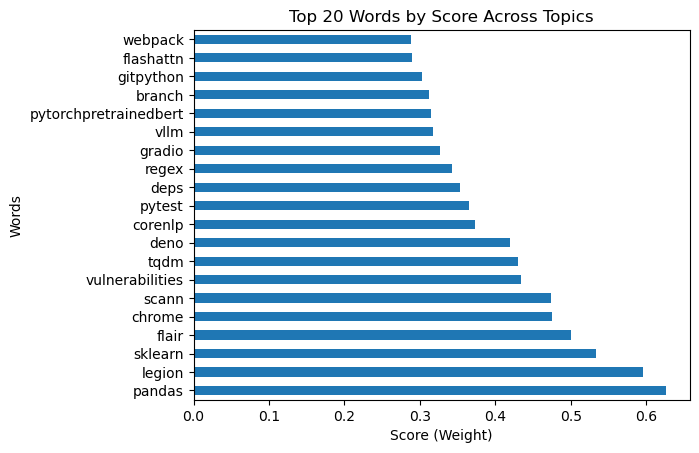

In [14]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_update['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_update.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:23:37,276 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

2025-03-27 15:23:53,171 - BERTopic - Embedding - Completed ✓
2025-03-27 15:23:53,171 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:24:01,841 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:24:01,842 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:24:02,615 - BERTopic - Cluster - Completed ✓
2025-03-27 15:24:02,618 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:24:02,755 - BERTopic - Representation - Completed ✓


             Word     Score
61      submodule  0.786878
55         initpy  0.650588
63          spacy  0.631374
44           vllm  0.584325
38  pyprojecttoml  0.558111
65        posthog  0.536304
32           reqs  0.535186
58          cmake  0.494308
57          flake  0.488822
49          isort  0.473371


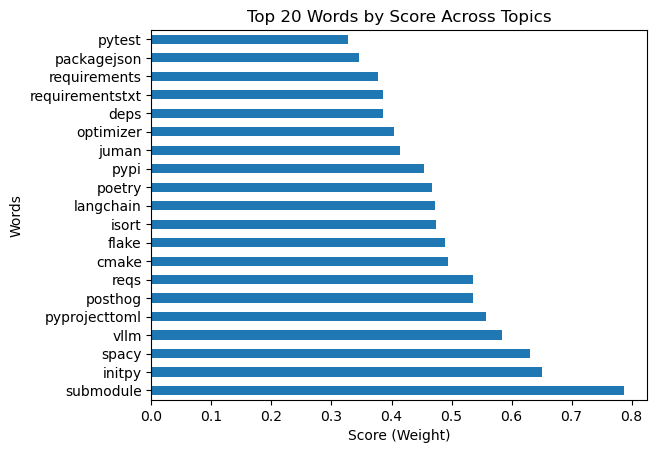

In [15]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_add['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_add.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:24:29,566 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/81 [00:00<?, ?it/s]

2025-03-27 15:24:39,389 - BERTopic - Embedding - Completed ✓
2025-03-27 15:24:39,390 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:24:47,394 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:24:47,396 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:24:48,091 - BERTopic - Cluster - Completed ✓
2025-03-27 15:24:48,095 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:24:48,192 - BERTopic - Representation - Completed ✓


            Word     Score
31    codeowners  0.556049
44        create  0.490059
46      unstable  0.489899
50          byml  0.420005
39        dhuang  0.386284
36         chore  0.381262
17          repo  0.378153
49         notes  0.376419
47  multilingual  0.359987
40          adam  0.346974


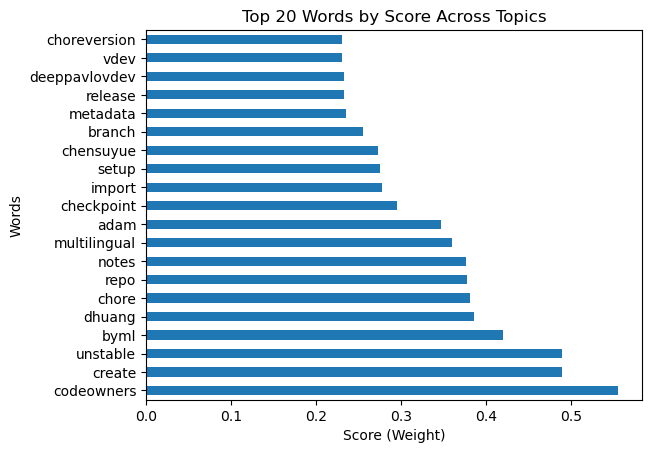

In [16]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_project['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_project.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-28 09:36:34,112 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2025-03-28 09:36:39,920 - BERTopic - Embedding - Completed ✓
2025-03-28 09:36:39,921 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-28 09:36:43,240 - BERTopic - Dimensionality - Completed ✓
2025-03-28 09:36:43,242 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-28 09:36:43,365 - BERTopic - Cluster - Completed ✓
2025-03-28 09:36:43,367 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-28 09:36:43,413 - BERTopic - Representation - Completed ✓


               Word     Score
15        directory  0.814976
13        submodule  0.605441
12     transformers  0.386782
5            import  0.292153
8              file  0.232001
4             merge  0.227836
14             yaml  0.224970
9         deepspeed  0.224884
7   requirementstxt  0.204850
10         datasets  0.204096


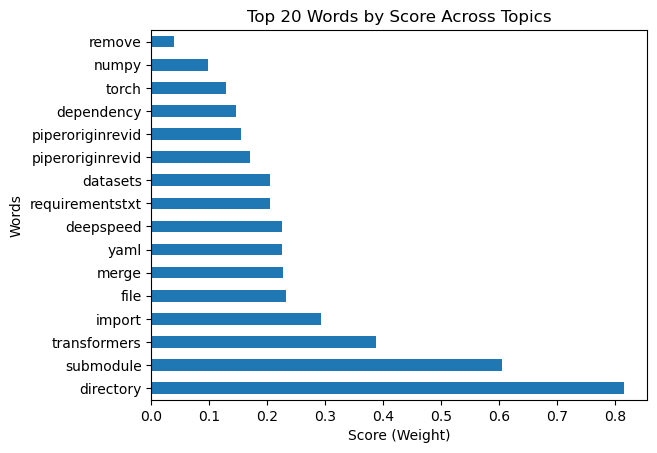

In [23]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_remove['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_remove.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-28 09:49:15,519 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/13 [00:00<?, ?it/s]

2025-03-28 09:49:20,501 - BERTopic - Embedding - Completed ✓
2025-03-28 09:49:20,502 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-28 09:49:24,518 - BERTopic - Dimensionality - Completed ✓
2025-03-28 09:49:24,519 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-28 09:49:24,577 - BERTopic - Cluster - Completed ✓
2025-03-28 09:49:24,582 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-28 09:49:24,619 - BERTopic - Representation - Completed ✓


      Word     Score
0  outputs  0.651728


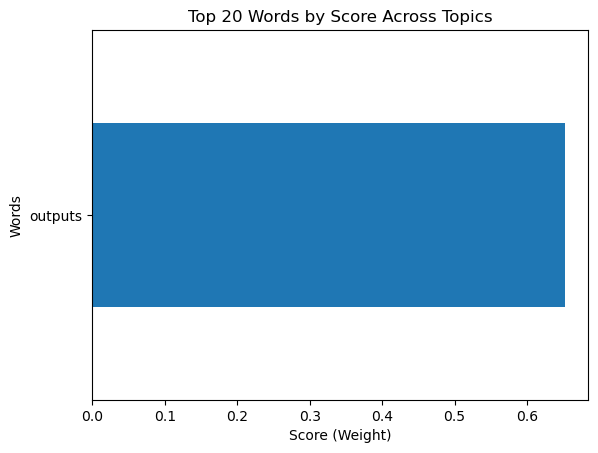

In [25]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Define additional unwanted words
custom_stopwords = {"github", "https", "http", "com", "www"}

# Extract commit messages as a list
docs = GH_output['commit_message'].astype(str).tolist()

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    
    # Remove URLs and anything with "github.com"
    text = re.sub(r'https?:\/\/\S+|www\.\S+', '', text)  # Remove full URLs
    text = re.sub(r'\bgithub\S*\b', '', text, flags=re.IGNORECASE)  # Remove words containing "github"
    text = re.sub(r'\bcom\b', '', text, flags=re.IGNORECASE)  # Remove "com" as a standalone word
    
    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list and custom stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in custom_stopwords])
    
    # Remove words shorter than 3 characters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()



import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "edit", "black", "typo"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("GH_output.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [26]:
topic_word_distributions

{0: [('add', 0.08388299799801402),
  ('output', 0.0792660466251076),
  ('fix', 0.06069946169364353),
  ('file', 0.05563893011924089),
  ('save', 0.04978341787611477),
  ('json', 0.04786516303184613),
  ('update', 0.040236051313253036),
  ('format', 0.039177207857641116),
  ('files', 0.03863359246203974),
  ('piperoriginrevid', 0.037821634760698775)],
 1: [('outputs', 0.6517280461404095),
  ('seq2seq', 0.48637995362879877),
  ('zaebuc', 0.40370158585237115),
  ('qalb15', 0.40370158585237115),
  ('morph', 0.40370158585237115),
  ('qalb14', 0.40370158585237115),
  ('fixes', 0.32189977969309874),
  ('mle', 0.3168984184192767),
  ('chatgpt', 0.3027761893892783),
  ('small', 0.3027761893892783)]}